# Integrate ode and approximate with a network

In this notebook we create a dataset from a differential equation and then train an approximate neural network on that data.

In [14]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## define differential equations



###  Lorenz 63 model

$dx/dt  = - \sigma (y-x)$

$dy/dt = x (\rho -z) -y$

$dz/dt = x y - \beta z$

$x(0)= x_0, y(0)=y_0, z(0)=z_0$

In the code we'll use x to denote a vector with (x,y,z)
See also [Lorenz at wikipedia](https://en.wikipedia.org/wiki/Lorenz_system)

In [41]:
# lorenz 63 equations
sigma = 10.0
beta = 8.0/3.0
rho=28.0
def lorenz63(t,state):
    x, y, z = state
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z 
x0_true = [-1.46938568, -0.82968588, 20.33234264]

## Simulate model

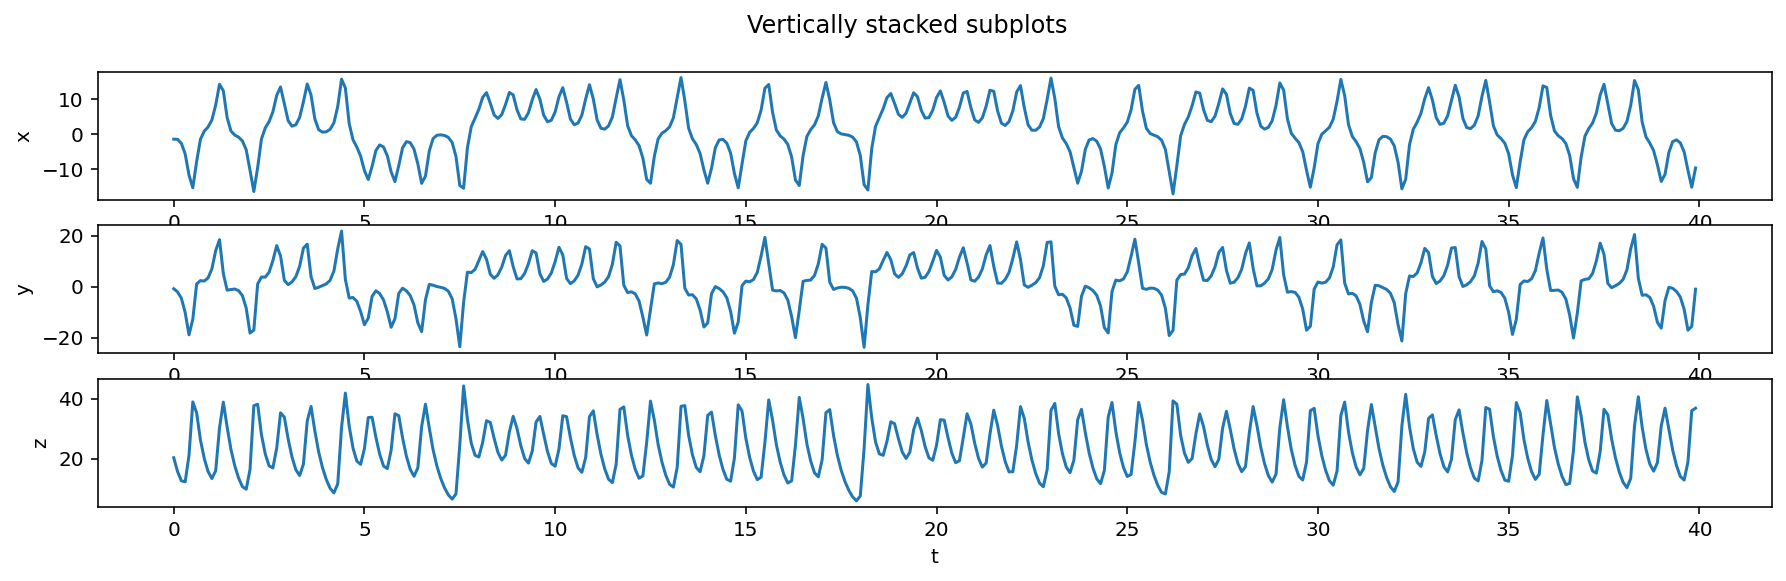

In [42]:
tstart=0.0
tend=40.0
tstep=0.1
t_output=np.arange(tstart,tend,step=tstep)
sol = solve_ivp(lorenz63, [tstart, tend], x0_true, t_eval=t_output)

fig, axs = plt.subplots(3, figsize=(15,4))
fig.suptitle('Vertically stacked subplots')
axs[0].plot(sol.t,sol.y[0])
axs[0].set_ylabel("x")
axs[1].plot(sol.t,sol.y[1])
axs[1].set_ylabel("y")
axs[2].plot(sol.t,sol.y[2])
axs[2].set_ylabel("z")
axs[2].set_xlabel("t")
plt.show()

In [45]:
# create training dataset
tstart=0.0
tend=100.0
tstep=0.1
t_train=np.arange(tstart,tend,step=tstep)
x0_train= [-10.41904706, -16.07509044,  20.99289982]
sol_train = solve_ivp(lorenz63, [tstart, tend], x0_train, t_eval=t_train)

x0_test=[12.05802086, 14.7646725 , 28.37399324]
t_test=np.arange(tstart,tend,step=tstep)
sol_train = solve_ivp(lorenz63, [tstart, tend], x0_test, t_eval=t_test)


In [44]:
sol_train.y[:,-1]

array([12.05801086, 14.7647725 , 28.37299324])